# Visualizations
## Matplotlib
Matplotlib is an essential Python library for creating charts. There is a massive number of options and settings. You will see basics and best practices of creating charts, which will allow you to create most charts you need.

The best introduction to Matplotlib  is in this link below, a few examples below are from this official documentation:
* http://matplotlib.org/faq/usage_faq.html

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML

Let us begin with a basic example. Notice that plt is simply matplotlib.pyplot - matplotlib's object for drawing.

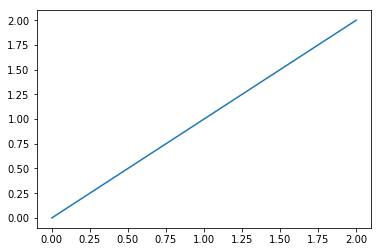

In [3]:
# create a series
x = np.linspace(0, 2, 100)
# draw it
plt.plot(x, x, label='Line chart')


Now, see what happens if you try to draw two charts, one by one.

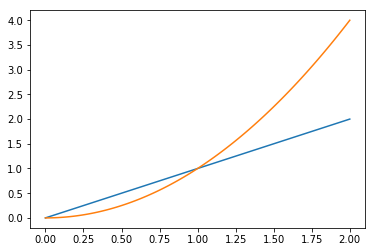

In [4]:
plt.plot(x, x, label='Linear function')
plt.plot(x, x**2, label='Quadratic function')

For some reasons both have been drawn on the same area/canvas. Now let us see, how to draw them separately.

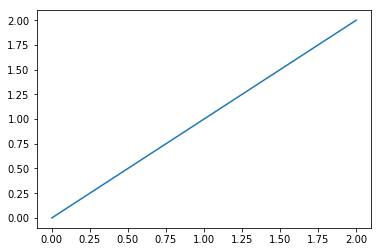

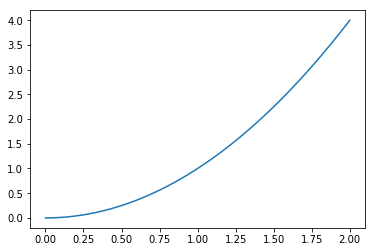

In [5]:
plt.plot(x, x, label='Linear function')
plt.show()
plt.plot(x, x**2, label='Quadratic function')
plt.show()

The first .plot() method creates a new chart (canvas to draw on). It is not shown until the cell has been fully executed or until you tell Python to show the chart (plt.show()). After a plot has been shown, it is closed. See an example below.

foo.png file is empty, because the plot has been saved after showing it (the buffer had been cleared).

In [ ]:
plt.plot(x, x, label='Linear function')
plt.show()
plt.savefig('img/foo.png')
plt.plot(x, x**2, label='Quadratic function')
plt.savefig('img/foo1.png')
plt.show()


Now, see what happens if you save images between adding series.

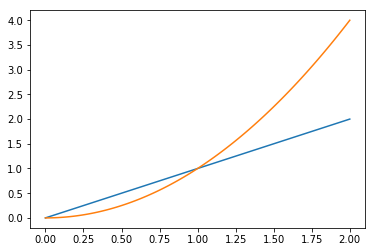

In [6]:
plt.plot(x, x, label='Linear function')
plt.savefig('img/boo.png')
plt.plot(x, x**2, label='Quadratic function')
plt.savefig('img/boo1.png')
plt.show()

As expected, boo.png contains only one series, and boo1.png contains two. Saving to a file does not clear the buffer.

Let us see how to add a few helpful pieces of information to a chart.

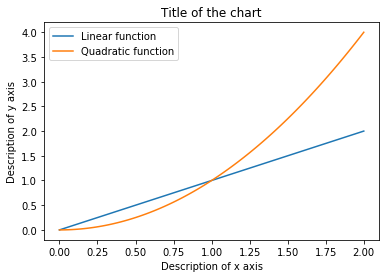

In [10]:
plt.plot(x, x, label='Linear function')
plt.plot(x, x**2, label='Quadratic function')
plt.xlabel('Description of x axis')
plt.ylabel('Description of y axis')
plt.title("Title of the chart")
plt.legend()

Now it starts to look properly and you can develop this idea further.

In practice, calling particular elements using the whole matplotlib object is not the best practice. If the chart is simple, it does not pose a problem. However, if you want to have greater control over the chart and combine it with other libraries, e.g. pandas, it is good to know how to control charts in a better way.

Matplotlib splits a chart into two objects, Figure and Axes. The first controls the whole canvas (the "wrapping" of the chart), and Axes are single charts, which do not have to ocupy the whole canvas.

Let us start with creating a picture/canvas in size 6,6.
* https://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure

In [8]:
fig = plt.figure(figsize=(6,6))

Now develop the empty canvas. fig.add_subplot(1, 1, 1) - the numbers are (respectively) rows and columns the canvas should be split into, and the number of the part of canvas you want to use. Function add_subplot returns Ax, a part of the whole canvas.
* https://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.add_subplot
* https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot
Note that commands to set axis labels and chart title have been slighly changed. The method names are a bit different for Ax object than for plt module.

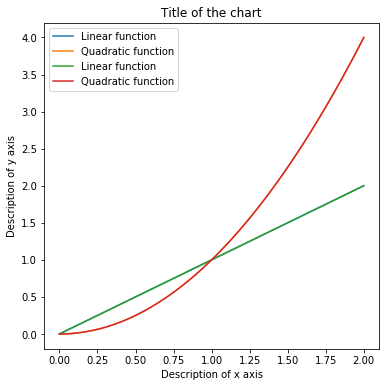

In [12]:
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, x, label='Linear function')
ax.plot(x, x**2, label='Quadratic function')
ax.set_xlabel('Description of x axis')
ax.set_ylabel('Description of y axis')
ax.set_title("Title of the chart")
ax.legend()
fig.savefig("img/fig.png")
# fig has been created in another cell, so the chart is not drawn automatically
fig

To better understand why ax is useful, see what happens in this example.

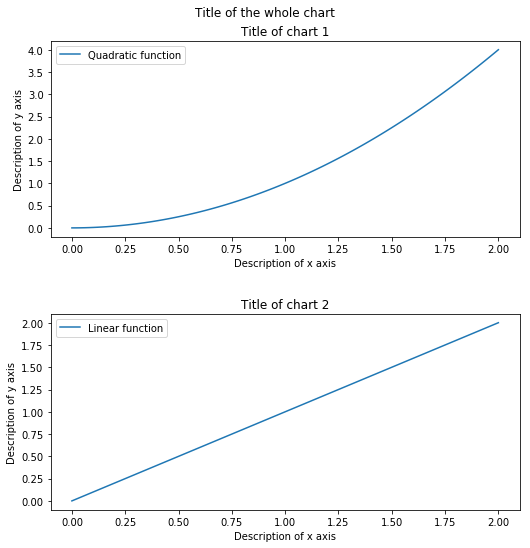

In [13]:

fig = plt.figure(figsize=(8,8))
fig.suptitle('Title of the whole chart', fontsize=12)

ax = fig.add_subplot(2, 1, 1)

ax.plot(x, x**2, label='Quadratic function')
ax.set_xlabel('Description of x axis')
ax.set_ylabel('Description of y axis')
ax.set_title("Title of chart 1")
ax.legend()

ax = fig.add_subplot(2, 1, 2)
ax.plot(x, x, label='Linear function')
ax.set_xlabel('Description of x axis')
ax.set_ylabel('Description of y axis')
ax.set_title("Title of chart 2")
ax.legend()
# tight_layout tries to align all elements in such a way that they do not overlap each other.
fig.tight_layout(pad=3)

Subplots and axes may be created in yet another, possibly more convenient way. The example is virtually identical to the one above, but for readability we join together the x axis (sharex) and get rid of one label and title.

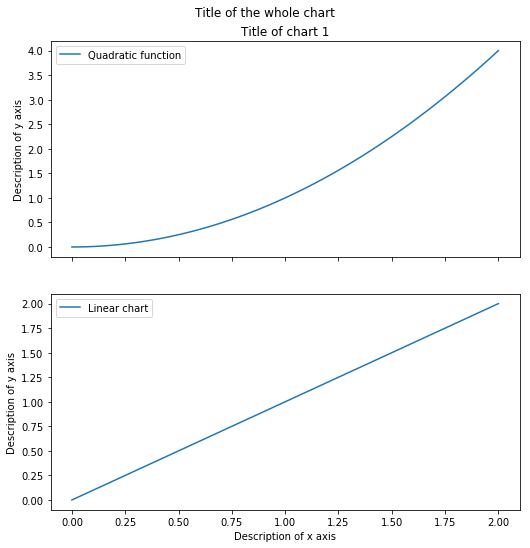

In [15]:
fig, ax = plt.subplots(2, 1,figsize=(8,8), sharex=True)

fig.suptitle('Title of the whole chart', fontsize=12)

ax[0].plot(x, x**2, label='Quadratic function')
# ax[0].set_xlabel('Description of x axis')
ax[0].set_ylabel('Description of y axis')
ax[0].set_title("Title of chart 1")
ax[0].legend()


ax[1].plot(x, x, label='Linear chart')
ax[1].set_xlabel('Description of x axis')
ax[1].set_ylabel('Description of y axis')
# ax[1].set_title("Title of chart 2")
ax[1].legend()
fig.tight_layout(pad=3)

You may create charts in any grid format. By the way - note that ax may also take a dictionary parameter.

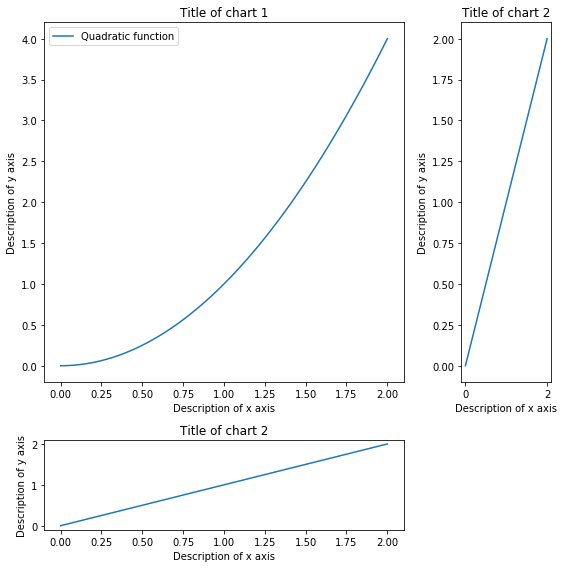

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(8,8), gridspec_kw={'width_ratios':[4, 1], 'height_ratios':[4, 1]})

ax[0,0].plot(x, x**2, label='Quadratic function')
ax[0,0].set(**{"xlabel":'Description of x axis', "ylabel":'Description of y axis', "title":'Title of chart 1'})
# ax[0,0].set_xlabel('Description of x axis')
# ax[0,0].set_ylabel('Description of y axis')
# ax[0,0].set_title("Title of chart 1")
ax[0,0].legend()


ax[1,0].plot(x, x, label='Linear function')
ax[1,0].set_xlabel('Description of x axis')
ax[1,0].set_ylabel('Description of y axis')
ax[1,0].set_title("Title of chart 2")



ax[0,1].plot(x, x, label='Linear function')
ax[0,1].set_xlabel('Description of x axis')
ax[0,1].set_ylabel('Description of y axis')
ax[0,1].set_title("Title of chart 2")

# In this case we do not want anything in the bottom right
# so we turn off drawing the axes and add nothing to the chart.
ax[1,1].axis("off")
fig.tight_layout()

In practice you may draw any shape of a canvas freely using add_axes, even shapes overlapping other ones.
* https://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.add_axes

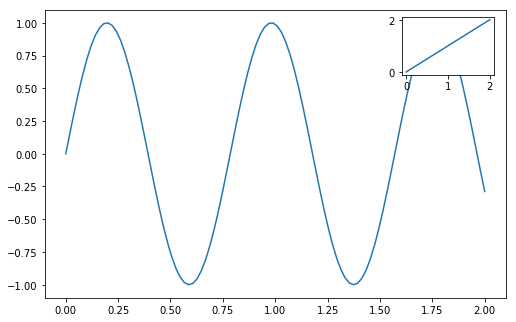

In [17]:
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax2 = fig.add_axes([0.72, 0.72, 0.16, 0.16])
ax1.plot(x, np.sin(8*x), label='Line chart of sine')
ax2.plot(x, x, label='Linear function')
